# Analyse, Classification et Indexation  des Données (ACID)

## (mini-)projet

Noms et prénoms des membres du binôme : 

- GARNIER Anatole
- VILLOT Yliane
### utiliser au moins 2 classifieurs et justifier pourquoi

Le but du projet est de mettre en oeuvre la régression linéaire et différentes méthodes de classification vues en cours.

Travail à rendre : ce notebook complété. Quelques cellules sont pré-remplies et donc à exécuter telles quelles. D'autres sont à compléter pour réaliser le travail demandé. 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

### Data

In [7]:
df = pd.read_csv('https://www.labri.fr/perso/zemmari/datasets/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,no
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,no
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,no
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,no
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,no


## Partie 1 : Régression Linéaire

Dans un premier temps, nous allons réaliser une régression du prix des voitures en fonction des caractéristiques numériques, et seulement celles-la.  

1. Donnez l'instruction permettant de ne prendre en considération que les champs numériques utilisables pour la régression.

In [8]:
contain_num_values = df.select_dtypes(include=(['int64', 'float64']))

In [9]:
contain_num_values

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


2. Réalisez les régressions linéaires successives jusqu'à obtenir un modèle valable ne prenant en compte que les variables vraiment explicatives.

In [10]:
# 1 - Méthode matrice de corrélation 
df.corr()

/tmp/cache-anagarnier/ipykernel_138551/2222158593.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [11]:
# Dans un premier temps, on laisse tomber le car ID car non impactant sur le prix. Ensuite, on regarde notre matrice de correlation. 
# Tout ce qui se rapproche fortement de 0 par rapport au prixsera écarté.
# On écarte donc symboling, carheight, stroke, compression ratio, peakrpm
reg_value = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']

In [12]:
# 2 - Méthode OLS
import statsmodels.api as sm

X = sm.add_constant(df[reg_value])
model = sm.OLS(df['price'], X)
results = model.fit().summary()
print(results)

/usr/lib/python3/dist-packages/statsmodels/__init__.py:6: UserWarning: This appears to be an armel system, on which statsmodels is buggy (crashes and possibly wrong answers) - https://bugs.debian.org/968210
  warnings.warn("This appears to be an armel system, on which statsmodels is buggy (crashes and possibly wrong answers) - https://bugs.debian.org/968210")
/usr/lib/python3/dist-packages/statsmodels/__init__.py:6: UserWarning: This appears to be an armel system, on which statsmodels is buggy (crashes and possibly wrong answers) - https://bugs.debian.org/968210
  warnings.warn("This appears to be an armel system, on which statsmodels is buggy (crashes and possibly wrong answers) - https://bugs.debian.org/968210")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     100.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.01e-68
Time:                        15:59:24   Log-Likelihood:                -1955.4
No. Observations:                 205   AIC:                             3931.
Df Residuals:                     195   BIC:                             3964.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.322e+04   1.38e+04     -3.141      0.0

In [13]:
# On enlève les var qui ont une Pvalue > 0.05
reg_value = ['carwidth', 'curbweight', 'enginesize', 'horsepower']

In [14]:
# On regarde de nouveau si il y a des valeurs non pertinentes 
X = sm.add_constant(df[reg_value])
model = sm.OLS(df['price'], X)
results = model.fit().summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     227.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.15e-73
Time:                        15:59:24   Log-Likelihood:                -1956.8
No. Observations:                 205   AIC:                             3924.
Df Residuals:                     200   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.623e+04   1.28e+04     -3.610      0.0

In [15]:
reg_value = ['carwidth', 'enginesize', 'horsepower']
X = sm.add_constant(df[reg_value])
model = sm.OLS(df['price'], X)
results = model.fit().summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     298.9
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           8.26e-74
Time:                        15:59:24   Log-Likelihood:                -1958.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     201   BIC:                             3938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.021e+04   1.02e+04     -5.889      0.0

In [16]:
# Le modèle semble bon
# On regarde maintenant la r_value la plus proche de 1 de chaque colonne
best = 0
name = ''
for i in reg_value:
    result = stats.linregress(df['price'], df[i])
    if result.rvalue > best:
        name = i
        best = result.rvalue

print(f"La valeur la plus intéressante est {name} avec une Rvalue de {best}")

La valeur la plus intéressante est enginesize avec une Rvalue de 0.8741448025245114


## Partie 2 : Classification

Le champ **Available** indique si la voiture est disponible à la vente ou non (il s'agit essentiellement de la capacité du fournisseur à fournir ce type de voiture dans un délai raisonnable). On souhaite donc, en faisant abstraction du prix, entrainer un modèle à prédire si la voiture serait disponible dans des délais raisonnables ou non. 

In [17]:
df = pd.read_csv('https://www.labri.fr/perso/zemmari/datasets/CarPrice.csv')
df.head()

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,1,3,alfa-romero giulia,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,no
1,2,3,alfa-romero stelvio,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,no
2,3,1,alfa-romero Quadrifoglio,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,no
3,4,2,audi 100 ls,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,no
4,5,2,audi 100ls,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,no


1. Exécutez la cellule suivante et observez le résultat. 

In [18]:
from sklearn import preprocessing
columns = df.columns
le = preprocessing.LabelEncoder()
for c in columns:
    le.fit(df[c])
    df[c] = le.transform(df[c])
df

,car_ID,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Available
0,0,5,2,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,118,0
1,1,5,3,0,1,0,2,0,2,22,...,5,23,4,13,30,10,8,10,137,0
2,2,3,1,0,1,2,2,0,10,29,...,5,1,28,13,45,10,6,9,137,0
3,3,4,4,0,0,3,1,0,30,45,...,5,13,25,22,27,16,11,13,123,0
4,4,4,5,0,0,3,0,0,28,45,...,5,13,25,5,33,16,5,5,148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,1,139,0,0,3,2,0,46,63,...,5,35,15,20,32,15,10,11,143,0
201,201,1,138,1,0,3,2,0,46,63,...,5,35,15,11,48,14,6,8,161,0
202,202,1,140,0,0,3,2,0,46,63,...,5,26,7,12,38,16,5,6,165,0
203,203,1,142,1,0,3,2,0,46,63,...,3,6,25,31,28,8,13,10,167,1


2. Testez différents algorithmes de machine learning pour prédire la disponibilité des voitures. Que pensez-vous des résultats obtenus? Expliquez.

In [19]:
# Tester K-nn, Classifieur ML(theorie de decision Bayesienne)

In [20]:
# 1 - K-nn
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Available'])
Y = df['Available']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.3, random_state=1)
print(xtrain.describe())
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest, y_pred)
acc = accuracy_score(ytest, y_pred)
print('Accuracy: {:2.2%}'.format(acc))
print(cm)

           car_ID   symboling     CarName  aspiration  doornumber     carbody  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean   103.503497    2.825175   77.986014    0.174825    0.405594    2.643357   
std     59.393991    1.285426   41.121768    0.381153    0.492733    0.883380   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     54.500000    2.000000   47.500000    0.000000    0.000000    2.000000   
50%    104.000000    3.000000   82.000000    0.000000    0.000000    3.000000   
75%    153.500000    4.000000  113.500000    0.000000    1.000000    3.000000   
max    203.000000    5.000000  145.000000    1.000000    1.000000    4.000000   

       drivewheel  enginelocation  wheelbase   carlength  ...  enginesize  \
count  143.000000      143.000000  143.00000  143.000000  ...  143.000000   
mean     1.335664        0.020979   22.65035   36.685315  ...   17.090909   
std      0.568468        0.143818   14.

In [21]:
def best_model_search(X_train, xtest, y_train, ytest, n=100, patience=10):
    k = 1
    best_acc = 0
    best_model = None
    p = patience
    while k <n and p >0 :
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(xtest)
        cm = confusion_matrix(ytest, y_pred)
        acc = np.sum(np.diag(cm))/np.sum(cm)
        print('k: ',k, '{:.2%}'.format(acc))
        if acc > best_acc:
            best_acc = acc
            best_model = knn
            p = patience + 1
        p = p -1
        k = k+1
    return best_model,k, best_acc

best_model_search(xtrain, xtest, ytrain, ytest)

# Le meilleur nombre de voisins a prendre en compte est donc 1 pour le classifieur k-nn 

k:  1 96.77%
k:  2 95.16%
k:  3 95.16%
k:  4 91.94%
k:  5 95.16%
k:  6 88.71%
k:  7 88.71%
k:  8 88.71%
k:  9 88.71%
k:  10 88.71%
k:  11 88.71%


(KNeighborsClassifier(metric='euclidean', n_neighbors=1),
 12,
 0.967741935483871)

In [22]:
# 2 - ML

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
y_pred = nb.predict(xtest)

cm = confusion_matrix(ytest, y_pred)
print(cm)

acc = accuracy_score(ytest, y_pred)
print('{:.2%}'.format(acc))
nb.get_params()

[[55  0]
 [ 3  4]]
95.16%


{'priors': None, 'var_smoothing': 1e-09}

In [23]:
# On a ici un classifieur k-nn plus précis qu'un classifieur ML

## Visualisation

On souhaite à présent visualiser les données dont on dispose. Proposez une solution. Commentez.

In [24]:
#Pour ce qui est de la visualisation, on va donc se baser sur le model le plus précis, à savoir le classifieur k-nn.

In [25]:
# Reduction de dimension ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#garde le nombre de composantes qui conservent 95% de la variance
model = PCA(n_components=0.95)
y = model.fit_transform(X)
model.n_components_

4

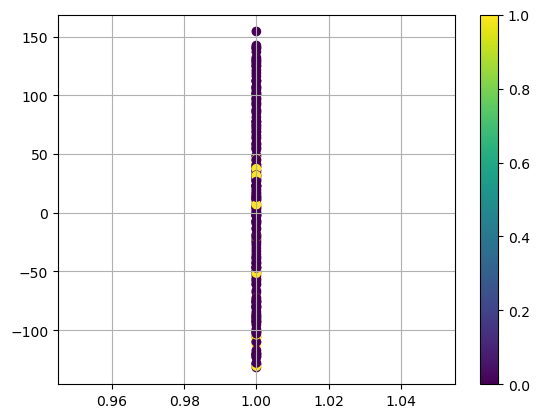

In [30]:
#ici on va garder seulement 1 seul axe pour visualiser
model = PCA(n_components=1) #
y = model.fit_transform(X)
plt.grid()
plt.scatter(np.ones(len(y)), y[:, 0], c=Y)
plt.colorbar()

In [48]:
# Reduction de dimension LDA
#on souhaite distinguer la séparation des classes

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import minmax_scale
# On initialise la LDA
lda = LinearDiscriminantAnalysis()

Z = minmax_scale(X)
#On applique la LDA sur les données normalisées
Y = lda.fit_transform(Z, df.Available)
Y

array([[-1.34443735],
       [-1.19581808],
       [-0.36429784],
       [ 1.0619786 ],
       [-1.60046055],
       [-1.40096502],
       [-0.73415711],
       [-0.43327668],
       [ 1.16682127],
       [-1.41375937],
       [-2.11986372],
       [-2.09536881],
       [ 0.3277925 ],
       [ 0.44250956],
       [ 0.90211578],
       [-2.83936617],
       [-2.83980119],
       [-2.51199791],
       [ 0.56816809],
       [ 0.06327596],
       [ 0.08536839],
       [-0.08976454],
       [-0.60999151],
       [-1.30840113],
       [-0.35227147],
       [-0.12786794],
       [ 0.04634961],
       [-1.02686876],
       [-0.43480097],
       [-0.50346545],
       [ 1.68428688],
       [-1.84508882],
       [ 0.4625474 ],
       [-1.44590488],
       [-1.22748249],
       [-1.11051984],
       [-0.62110572],
       [-1.23208092],
       [-0.88185364],
       [-1.39030923],
       [-1.00029436],
       [-0.39609904],
       [-0.90381278],
       [-1.51888894],
       [ 0.46325963],
       [ 0

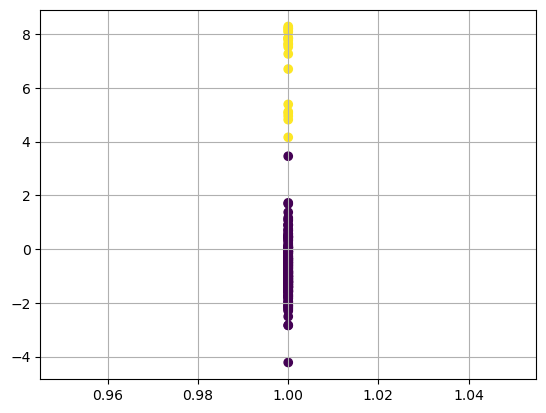

In [49]:
#On affiche
plt.grid()
plt.scatter(np.ones(len(Y)), Y[:, 0], c=df.Available)